<a href="https://colab.research.google.com/github/saranya9876/portfolio_saranya/blob/master/parkinson_s_disease_detection_using_ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Machine Learning to Analyze Voice Disorders for Parkinson's Disease Detection**


## The purpose of this project is to develop a machine learning model that can accurately predict the presence of Parkinson's disease in an individual based on their voice recordings. Parkinson's disease is a neurodegenerative disorder that affects movement, with symptoms that include tremors, stiffness, and difficulty with coordination.

<div style="text-align:center">
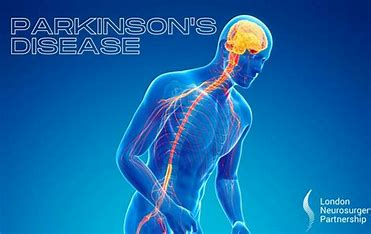
</div>

<div style="text-align:center">
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX01JCEN/images/parkinson_patient_voice.png" width="500" alt="parkinson detection">
</div>

----


# Setup


# Installing Required Libraries


In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sherin143
Your Kaggle Key: ··········


100%|██████████| 15.6k/15.6k [00:00<00:00, 20.5MB/s]

##  Importing Required Libraries

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
import itertools  # Import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool






## Reading the data

In [ ]:
data = pd.read_csv("/content/parkinsons-disease-data-set/parkinsons.data", sep=',', index_col='name') # assign index column to name
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##   Number of samples


In [ ]:
print(data.shape)

(195, 23)


<ipython-input-5-dc17fb207ac6>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


<Axes: >

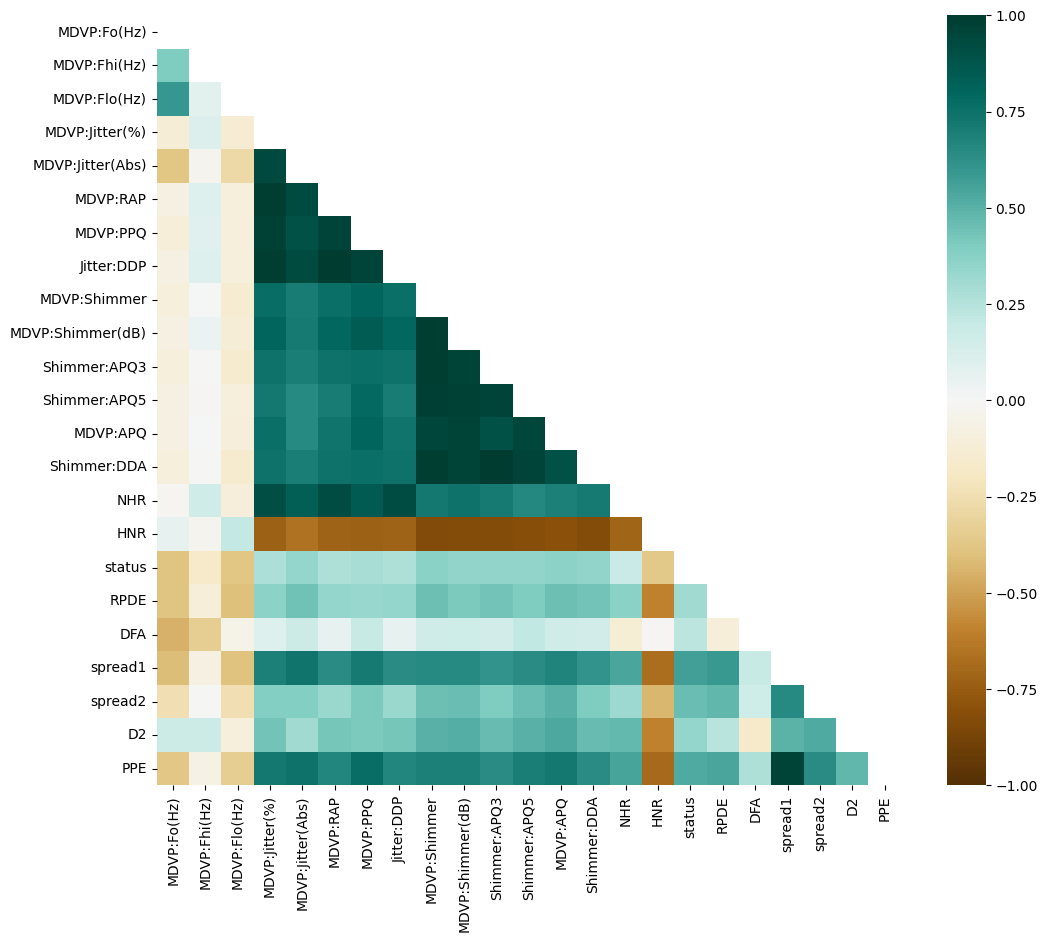

In [ ]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

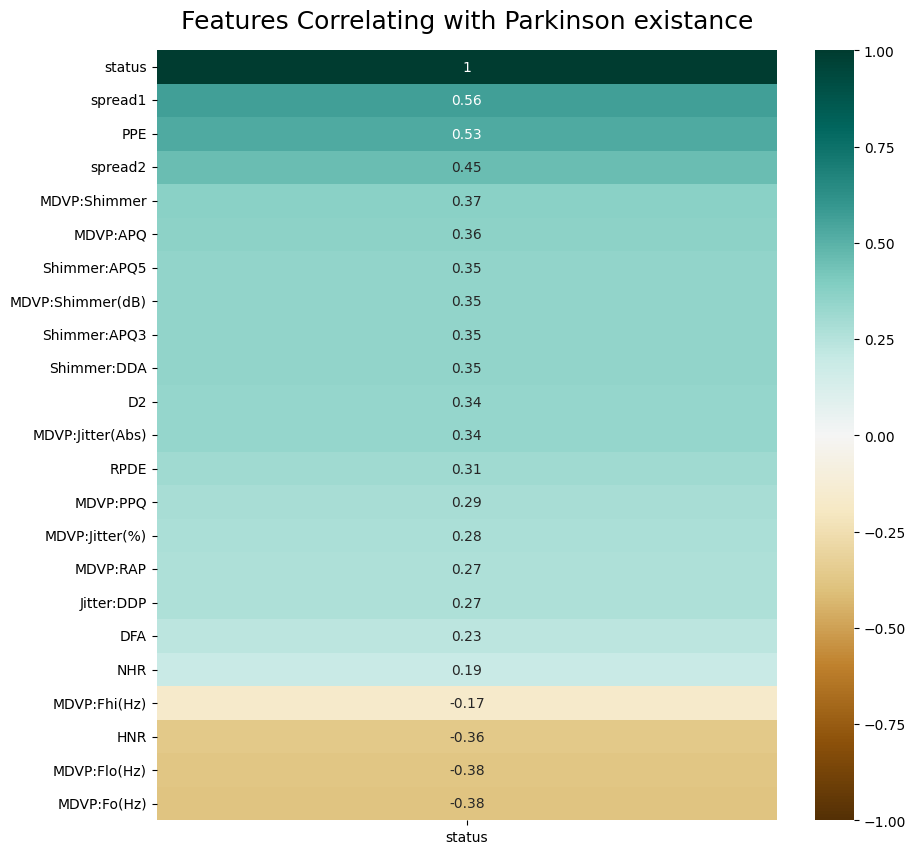

In [ ]:
# modify the headmap plot to show correlation variables to the status
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16);

In [ ]:
X = data.drop('status', axis=1)
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## The   Health status of the subject (one) - Parkinson's, (zero) - healthy  is given in the ```status``` column:


In [ ]:
y=data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

### we can see that 3/4 of the samples are have Parkinson's


In [ ]:
y.value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

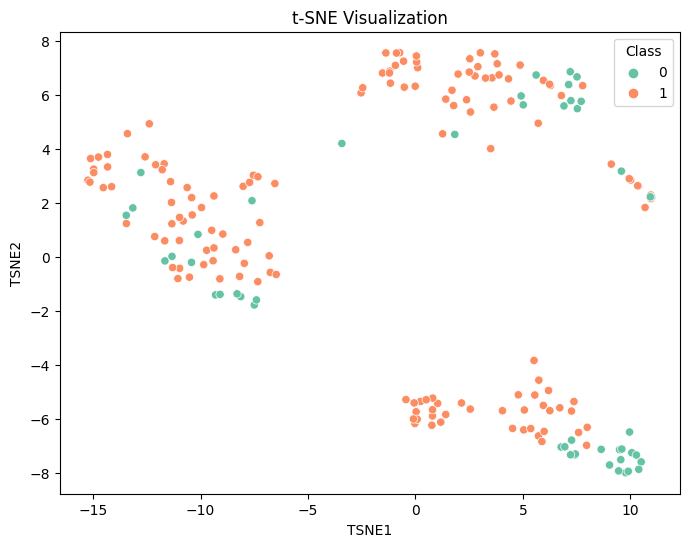

In [ ]:
# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

##  DATA PREPARATION





In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


## MACHINE LEARNING MODELS

# 1. XGBoost Model

In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
pip install scikit-learn xgboost


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/content/parkinsons-disease-data-set/parkinsons.data')  # Replace with the actual path to your dataset

# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Replace with the actual column names
y = data['status']  # Replace with the actual column name


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report with precision, recall, and F1-score
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model


# Display a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



 **CONFUSION MATRIX FOR XGBOOST**

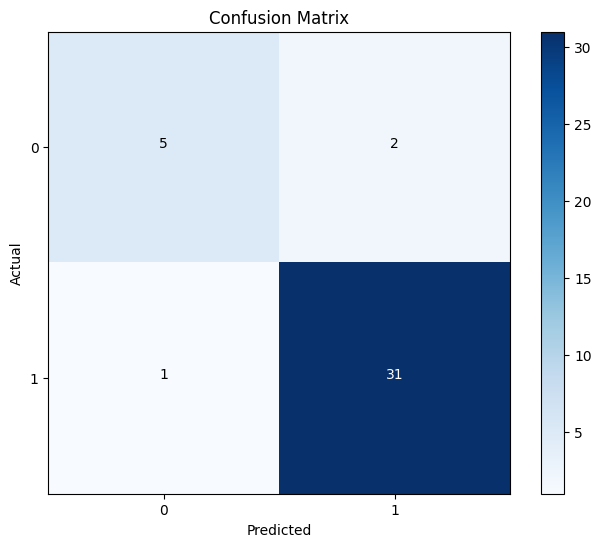

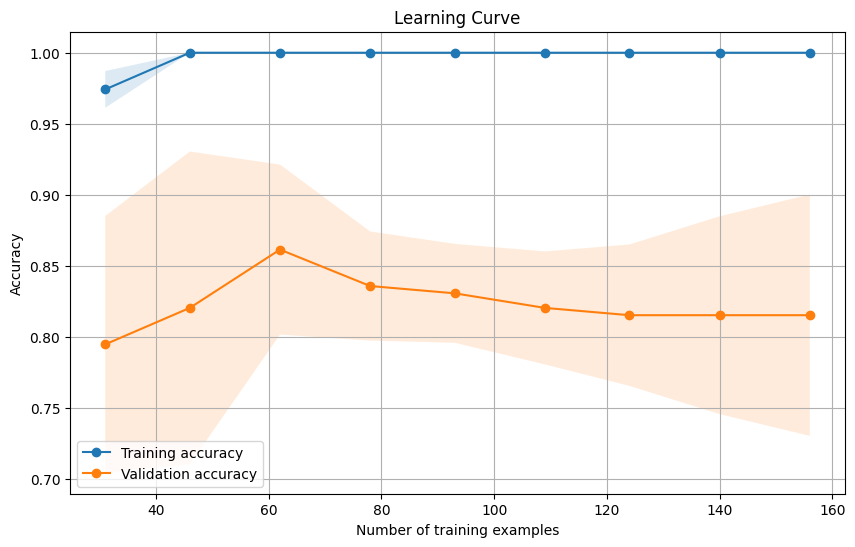

In [ ]:
data = pd.read_csv("/content/parkinsons-disease-data-set/parkinsons.data", sep=',', index_col='name') # assign index column to name
data.head()


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()



# 2.Ensemble Model

In [ ]:
# Load the dataset
data = pd.read_csv('/content/parkinsons-disease-data-set/parkinsons.data')  # Replace with the actual path to your dataset

# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']



# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual classifiers (Random Forest and XGBoost)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

# Create a voting ensemble of classifiers
ensemble_model = VotingClassifier(estimators=[('Random Forest', rf_classifier), ('XGBoost', xgb_classifier)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9487179487179487

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



 **CONFUSION MATRIX FOR ENSEMBLE**

Confusion Matrix:
 [[ 5  2]
 [ 0 32]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:379: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    result_msg += f"test={test_scores[scorer_name]:.3f})"
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    Test data that will be fed to estimator.predict.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    

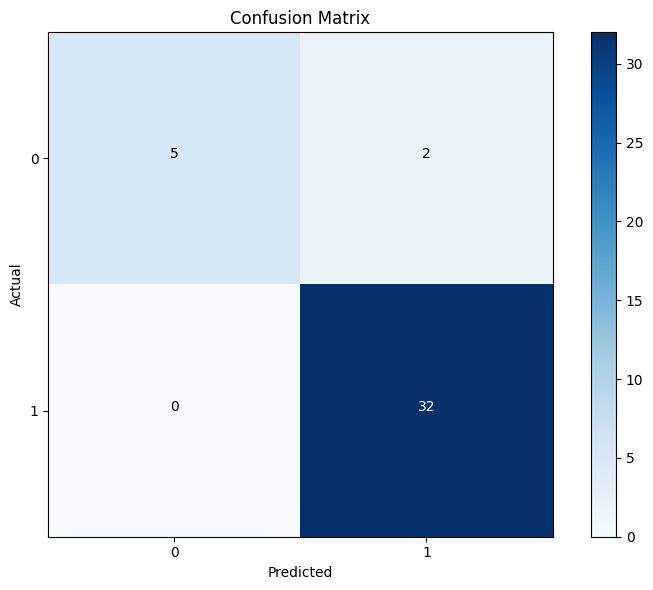

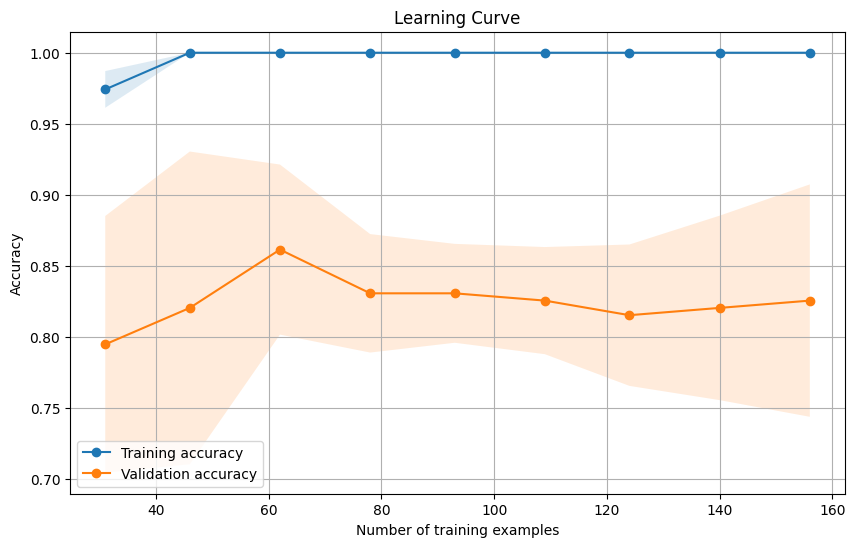

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

## 3. CatBoost

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

# Create a CatBoost Pool for training
train_pool = Pool(data=X_train, label=y_train)

# Fit the CatBoost classifier to the training data
catboost_classifier.fit(train_pool)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# Evaluate the CatBoost model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9487179487179487

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



**CONFUSION MATRIX FOR CATBOOSTCLASSIFIER**

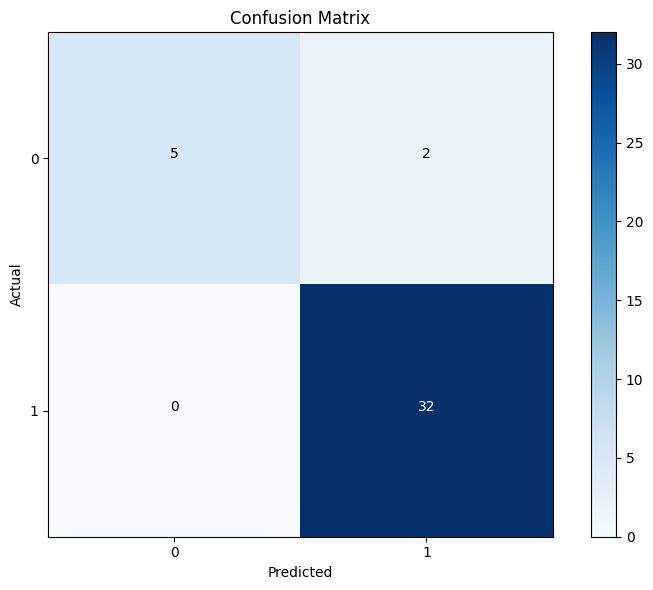

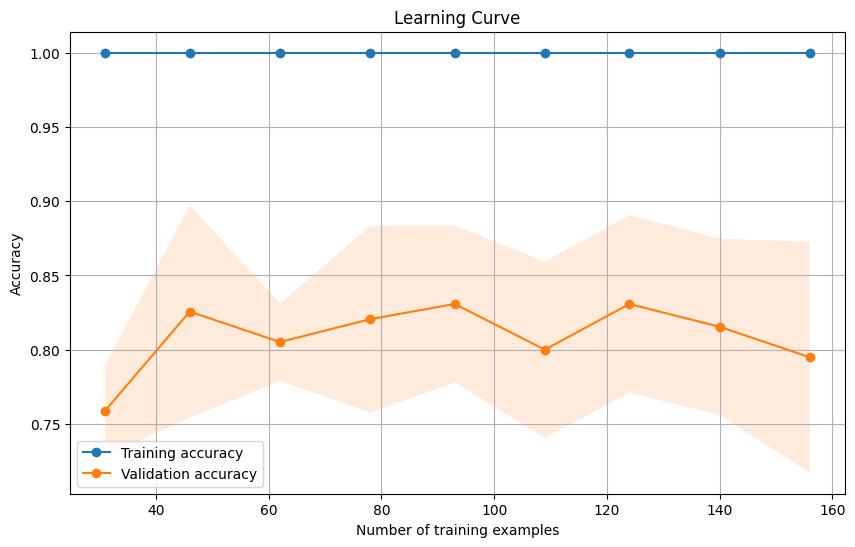

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(catboost_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

## 4. Random forest

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9487179487179487

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



**CONFUSION MATRIX FOR RANDOM FOREST**

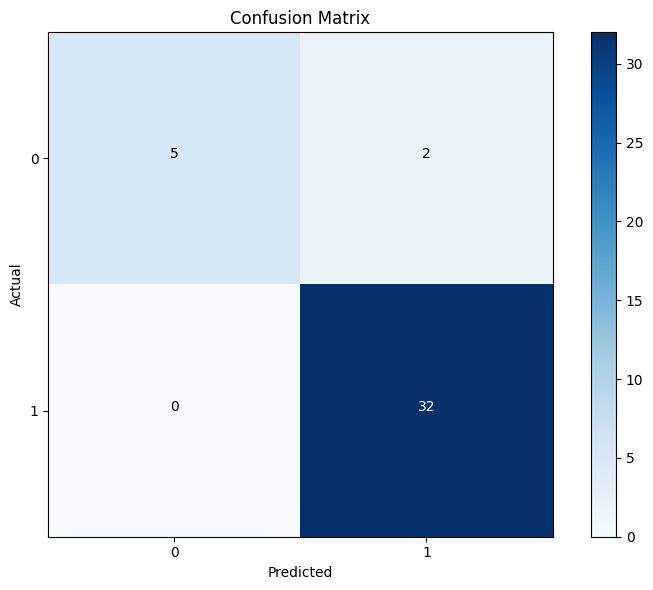

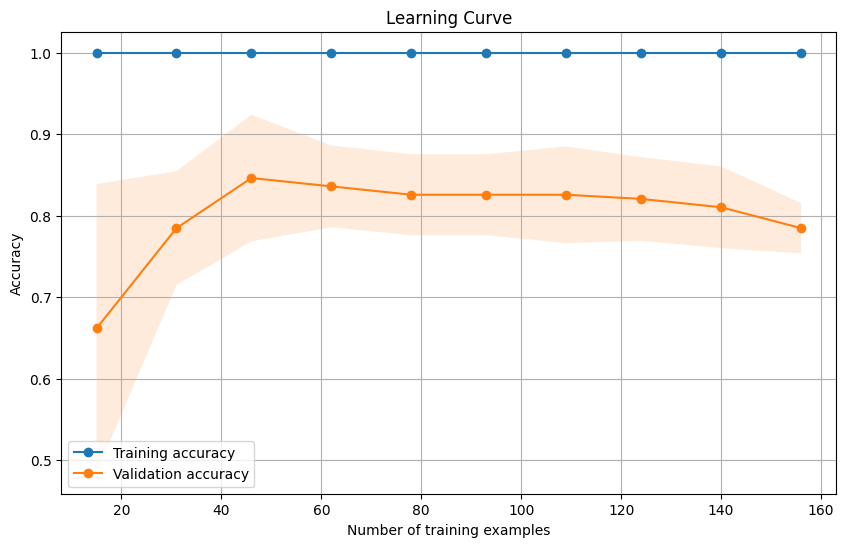

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

## Saving the model file

In [ ]:
import joblib

# Assuming you have a trained model stored in the 'model' variable
joblib.dump(model, 'rf_classifier.joblib')


['rf_classifier.joblib']

## 5.GradientBoost

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop(columns=['name', 'status'])  # Exclude 'name' and 'status' columns as needed
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display a classification report with precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



**CONFUSION MATRIX FOR GRADIENTBOOSTCLASSIFIER**

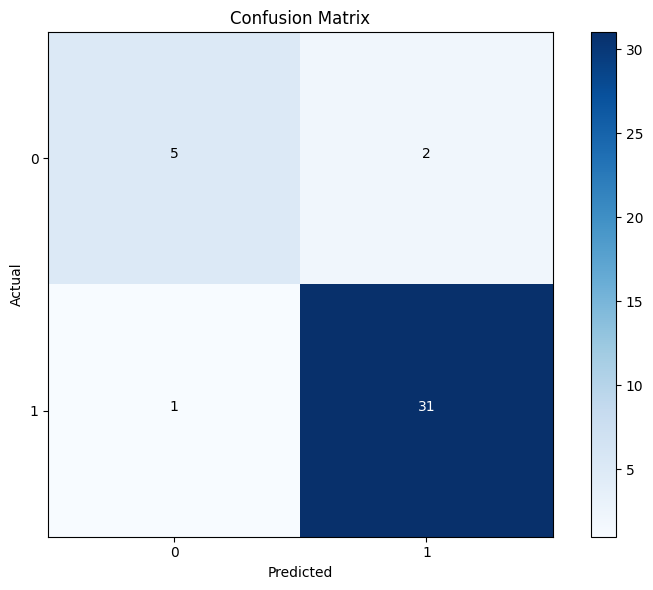

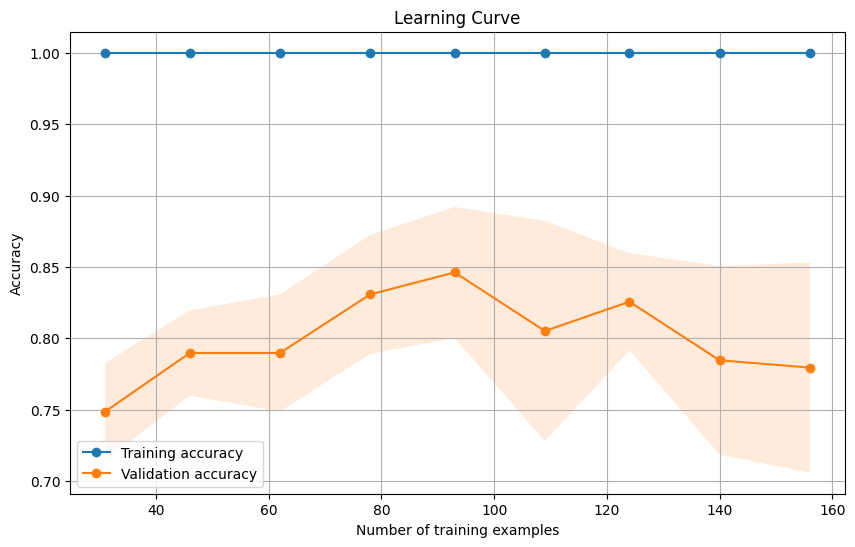

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(gb_classifier, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

**CLASSIFICATION REPORT FOR THE DIFFERENT EVALUATION METRICS OVER MODELS**

In [ ]:
from xgboost import XGBClassifier



In [ ]:
from sklearn.metrics import classification_report

# Initialize the classifiers
classifiers = {
    'XGBoost': XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_seed=42, verbose=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Ensemble Model': ensemble_model
}

# Initialize an empty DataFrame to store classification reports
import pandas as pd
classification_reports_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluate each classifier and store its classification report
for name, classifier in classifiers.items():
    # Train the classifier
    if name != 'Ensemble Model':
        classifier.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = classifier.predict(X_test)

        # Generate a classification report
        report = classification_report(y_test, y_pred, output_dict=True)

        # Extract the metrics
        accuracy = report['accuracy']
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']

        # Add the metrics to the DataFrame
        classification_reports_df = classification_reports_df.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1_score
        }, ignore_index=True)

# Train and evaluate the ensemble model
'''ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_report = classification_report(y_test, y_pred_ensemble, output_dict=True)

# Extract the metrics for the ensemble model
ensemble_accuracy = ensemble_report['accuracy']
ensemble_precision = ensemble_report['weighted avg']['precision']
ensemble_recall = ensemble_report['weighted avg']['recall']
ensemble_f1_score = ensemble_report['weighted avg']['f1-score']'''

# Add the metrics for the ensemble model to the DataFrame
classification_reports_df = classification_reports_df.append({
    'Model': 'Ensemble Model',
    'Accuracy': ensemble_accuracy,
    'Precision': ensemble_precision,
    'Recall': ensemble_recall,
    'F1-Score': ensemble_f1_score
}, ignore_index=True)




<ipython-input-56-d686683d782e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_reports_df = classification_reports_df.append({
<ipython-input-56-d686683d782e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_reports_df = classification_reports_df.append({
<ipython-input-56-d686683d782e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_reports_df = classification_reports_df.append({
<ipython-input-56-d686683d782e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_reports_df = classification_reports_df.append({


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and metrics
models = classification_reports_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Set the y-axis range from 7 to 9

print(classification_reports_df)





               Model  Accuracy  Precision    Recall  F1-Score
0            XGBoost  0.923077   0.920357  0.923077  0.920710
1      Random Forest  0.948718   0.951735  0.948718  0.945221
2           CatBoost  0.948718   0.951735  0.948718  0.945221
3  Gradient Boosting  0.923077   0.920357  0.923077  0.920710


CLASSIFICATION REPORT OF DIFFERENT MODELA BAR CHART

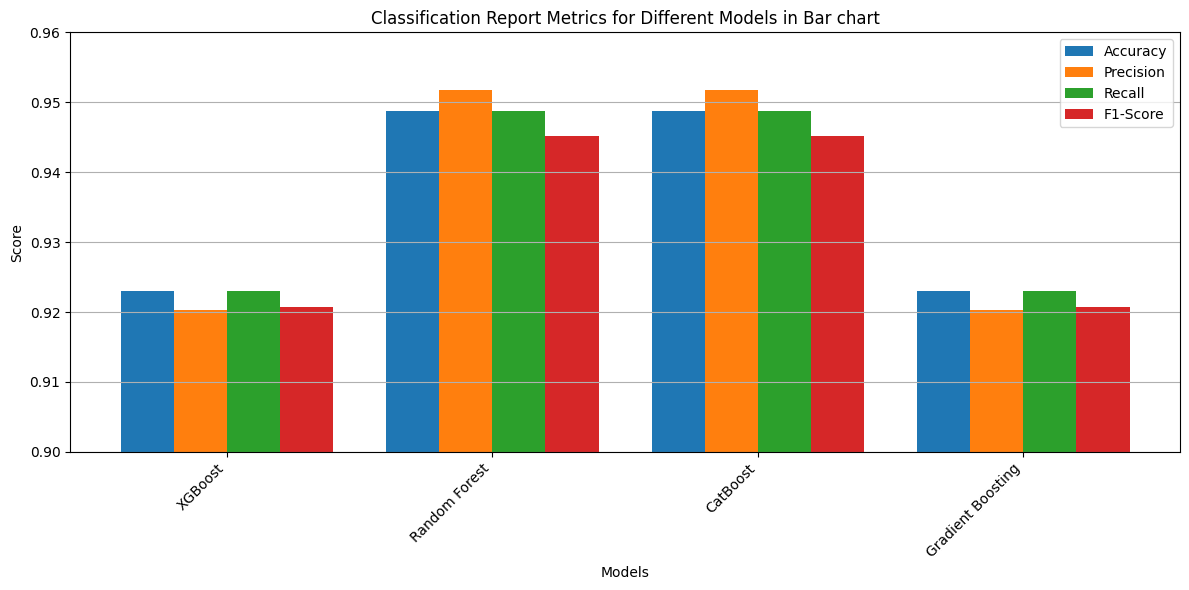

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude the 'Model' column to plot only the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create an index for the models
index = np.arange(len(classification_reports_df))

# Define the bar width
bar_width = 0.2

# Loop through each metric and plot a bar for each model
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, classification_reports_df[metric], bar_width, label=metric)

# Set the x-ticks and labels
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Classification Report Metrics for Different Models in Bar chart')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, classification_reports_df['Model'], rotation=45, ha='right')
plt.ylim(0.9, 0.96)  # Adjust the y-axis limits if needed
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Validating the Model


In [ ]:
import pandas as pd
import re
import numpy as np

# Initialize a dictionary to store feature values
input_data = {
    'MDVP:Fo(Hz)': float(input('Enter MDVP:Fo(Hz): ')),
    'MDVP:Fhi(Hz)': float(input('Enter MDVP:Fhi(Hz): ')),
    'MDVP:Flo(Hz)': float(input('Enter MDVP:Flo(Hz): ')),
    'MDVP:Jitter(%)': float(input('Enter MDVP:Jitter(%): ')),
    'MDVP:Jitter(Abs)': float(input('Enter MDVP:Jitter(Abs): ')),
    'MDVP:RAP': float(input('Enter MDVP:RAP: ')),
    'MDVP:PPQ': float(input('Enter MDVP:PPQ: ')),
    'Jitter:DDP': float(input('Enter Jitter:DDP: ')),
    'MDVP:Shimmer': float(input('Enter MDVP:Shimmer: ')),
    'MDVP:Shimmer(dB)': float(input('Enter MDVP:Shimmer(dB): ')),
    'Shimmer:APQ3': float(input('Enter Shimmer:APQ3: ')),
    'Shimmer:APQ5': float(input('Enter Shimmer:APQ5: ')),
    'MDVP:APQ': float(input('Enter MDVP:APQ: ')),
    'Shimmer:DDA': float(input('Enter Shimmer:DDA: ')),
    'NHR': float(input('Enter NHR: ')),
    'HNR': float(input('Enter HNR: ')),
    'RPDE': float(input('Enter RPDE: ')),
    'DFA': float(input('Enter DFA: ')),
    'spread1': float(input('Enter spread1: ')),
    'spread2': float(input('Enter spread2: ')),
    'D2': float(input('Enter D2: ')),
    'PPE': float(input('Enter PPE: '))
}

# Create a DataFrame from the input data
input_df = pd.DataFrame([input_data])

# Make predictions using the trained model
predictions = rf_classifier.predict(input_df)

# Interpret the predictions (0 for healthy, 1 for Parkinson's)
if predictions[0] == 0:
    print('The model predicts that the person is healthy.')
else:
    print('The model predicts that the person has Parkinson\'s disease.')

Enter MDVP:Fo(Hz): 0.235566
Enter MDVP:Fhi(Hz): 0.2445
Enter MDVP:Flo(Hz): 0.56788
Enter MDVP:Jitter(%): 2.56677
Enter MDVP:Jitter(Abs): 0.56673
Enter MDVP:RAP: 0.563778
Enter MDVP:PPQ: 0.35636788
Enter Jitter:DDP: 0.563736
Enter MDVP:Shimmer: 0.35677
Enter MDVP:Shimmer(dB): 0.453663
Enter Shimmer:APQ3: 0.45637737
Enter Shimmer:APQ5: 0.5667888
Enter MDVP:APQ: 0.35667
Enter Shimmer:DDA: 0.63673737
Enter NHR: 0.356367
Enter HNR: 0.35667
Enter RPDE: 0.35678
Enter DFA: 0.373788
Enter spread1: -4.36778
Enter spread2: 0.37883
Enter D2: 0.5663456
Enter PPE: 0.6778383
The model predicts that the person has Parkinson's disease.
